# Vector Manipulation in Python

In this lab, you will have the opportunity to practice once again with the NumPy library. This time, we will explore some advanced operations with arrays and matrices.

At the end of the previous module, we used PCA to transform a set of many variables into a set of only two uncorrelated variables. This was done by means of a transformation of the data called _rotation_. 

In this week's assignment, you will need to find a transformation matrix from English to French vector space embeddings. Such a transformation matrix is nothing else but a matrix that rotates and scales vector spaces.

In this notebook, we will explain in detail the rotation transformation. 

## Transforming vectors ( Scaling and Roation )

There are three main vector transformations:
* Scaling
* Translation
* Rotation

In previous notebooks, we applied the first two kinds of transformations. Now, let us learn how to use a fundamental transformation on vectors called _rotation_.

The rotation operation changes the direction of a vector, leaving unaffected its dimensionality and its norm. Let us explain this with some examples. 

In the following cells, we will define a NumPy matrix and a column vector as a NumPy array. Soon we will explain how this is related to matrix rotation.

In [4]:
import numpy as np                     # Import numpy for array manipulation
import matplotlib.pyplot as plt        # Import matplotlib for charts
from utils_nb import plot_vectors      # Function to plot vectors (arrows)

In [5]:
# Create a 2 x 2 matrix
R = np.array([[-2, 0],
              [0, 2]])
R

array([[-2,  0],
       [ 0,  2]])

In [6]:
x = np.array([[1, 1]]) # Create a row vector as a NumPy array with a single row
x

array([[1, 1]])

The dot product between a square matrix and the transpose of a row vector produces a rotation and scaling of the original vector. 

Remember that our recommended way to get the dot product in Python is np.dot(a, b):

In [7]:
y = np.dot(R, x.T) # Apply the dot product between R and x.T
y     

array([[-2],
       [ 2]])

We are going to use Pyplot to visually inspect the effect of the rotation on 2D vectors. For that, we have created a function `plot_vectors()` that takes care of all the intricate parts of the visual formatting. The code for this function is inside the `utils_nb.py` file. 

Now we can plot the vector $\vec x = [1, 1]$ in a cartesian plane. The cartesian plane will be centered at `[0,0]` and its x and y limits will be between `[-4, +4]`

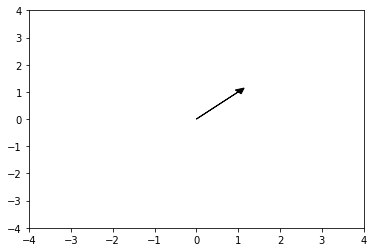

In [8]:
plot_vectors([x], axes=[4, 4], fname='transform_x.svg')

Now, let's plot in the same system our vector $\vec x = [1, 1]$ and the dot product of the matrix with $x.T$.

$$R = \begin{bmatrix} -2 & 0 \\ 0 & 2 \end{bmatrix}$$

$$y = R \cdot x.T$$

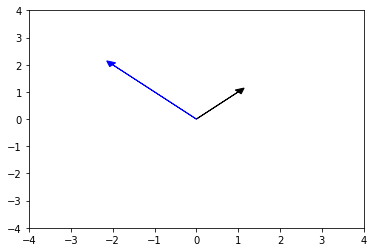

In [9]:
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

Note that the vector `x` (black) is transformed into vector `y` (blue).

### Example 2

We are going to use Pyplot to visually inspect the effect of the rotation on 2D vectors. For that, we have created a function that takes care of all the intricate parts of the visual formatting. The following procedure plots an arrow within a Pyplot canvas.

Data that is composed of 2 real attributes belongs to a $ RxR $ or $ R^2 $ space. Rotation matrices in $R^2$ rotate a given vector $\vec x$ by a counterclockwise angle $\theta$ in a fixed coordinate system. Rotation matrices are of the form:

$$Ro = \begin{bmatrix} cos \theta & -sin \theta \\ sin \theta & cos \theta \end{bmatrix}$$

**(Note:** This notebook uses $$y = Ro \cdot x.T$$ But if you use $$y = x \cdot Ro$$

then the rotation matrices in $R^2$ rotate a given vector $\vec x$ by a clockwise angle $\theta$ in a fixed coordinate system**).**

The trigonometric functions in Numpy require the angle in radians, not in degrees. In the next cell, we define a rotation matrix that rotates vectors counterclockwise by $100^o$.

In [10]:
angle = 100 * (np.pi / 180) # Convert degrees to radians

Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

x2 = np.array([[2, 2]])    # Row vector as a NumPy array
y2 = np.dot(Ro, x2.T)

print('Rotation matrix')
print(Ro)
print('\nRotated vector')
print(y2)

print('\n x2 norm', np.linalg.norm(x2))
print('\n y2 norm', np.linalg.norm(y2))
print('\n Rotation matrix norm', np.linalg.norm(Ro))

Rotation matrix
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]

Rotated vector
[[-2.31691186]
 [ 1.62231915]]

 x2 norm 2.8284271247461903

 y2 norm 2.82842712474619

 Rotation matrix norm 1.414213562373095


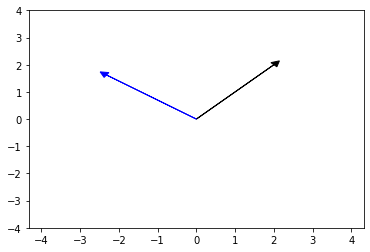

In [11]:
plot_vectors([x2, y2], fname='transform_02.svg')

Some points to note:

* The norm of the input vector is the same as the norm of the output vector. Rotation matrices do not modify the norm of the vector, only its direction.
* The norm of any $R^2$ rotation matrix is always $\sqrt 2 = 1.414221$

## Frobenius Norm

The Frobenius norm is the generalization to $R^2$ of the already known norm function for vectors 

$$\| \vec a \| = \sqrt {{\vec a} \cdot {\vec a}} $$

For a given $R^2$ matrix A, the frobenius norm is defined as:

$$\|\mathrm{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}$$

In [12]:
A = np.array([[2, 2],
              [2, 2]])

`np.square()` is a way to square each element of a matrix. Its outcome is equivalent to that of using the * operator with numpy arrays.

In [13]:
A_squared = np.square(A)
A_squared

array([[4, 4],
       [4, 4]])

In [14]:
A_squared = A * A
A_squared

array([[4, 4],
       [4, 4]])

In [15]:
A_Frobenius = np.sqrt(np.sum(A_squared))
A_Frobenius

4.0

Now you can sum over the elements of the resulting array, and then get the square root of the sum.
That was the extended version of the `np.linalg.norm()` function. You can check that it yields the same result.

In [16]:
print('Frobenius norm of the Rotation matrix')
print(np.sqrt(np.sum(Ro * Ro)), '== ', np.linalg.norm(Ro))

Frobenius norm of the Rotation matrix
1.414213562373095 ==  1.414213562373095


## Normal Vector: which is perpendicular to the plane

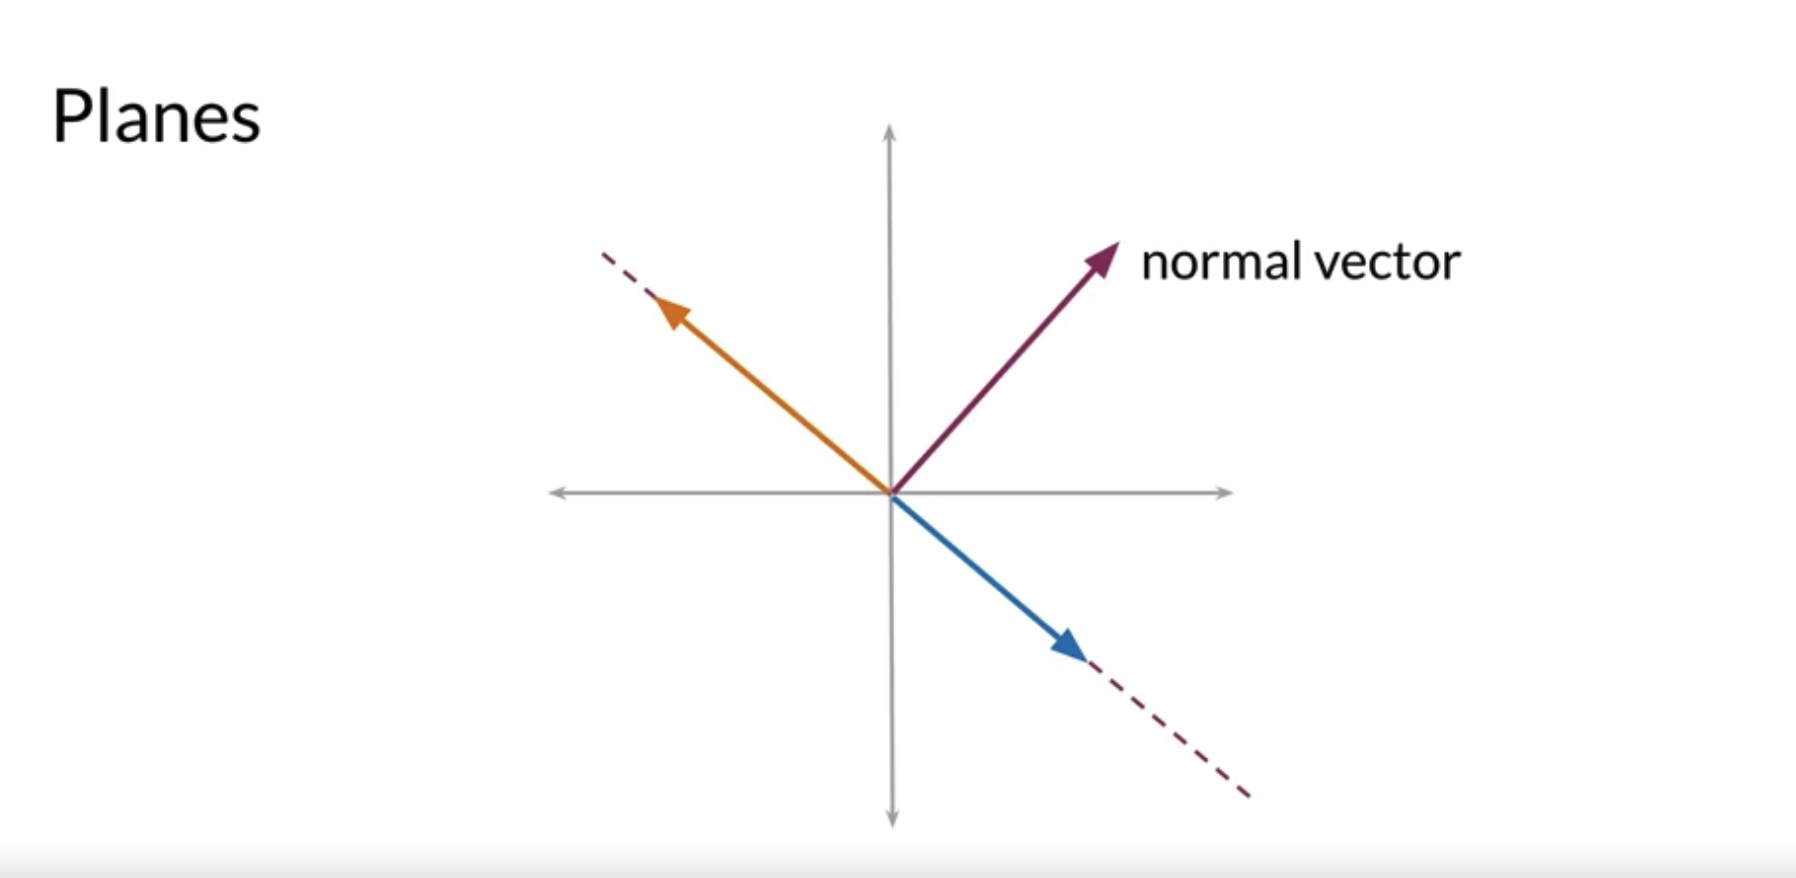

## How to check if two Vectors are on the plane, in the same direction of the plan or in the apposite direction of the plan

Step 1: how to check if the vector $V_1$, $V_2$ and $V_3$ are on the plane, in the same direction of the plan or in the apposite direction of the plan $w.r.t$ Vector P

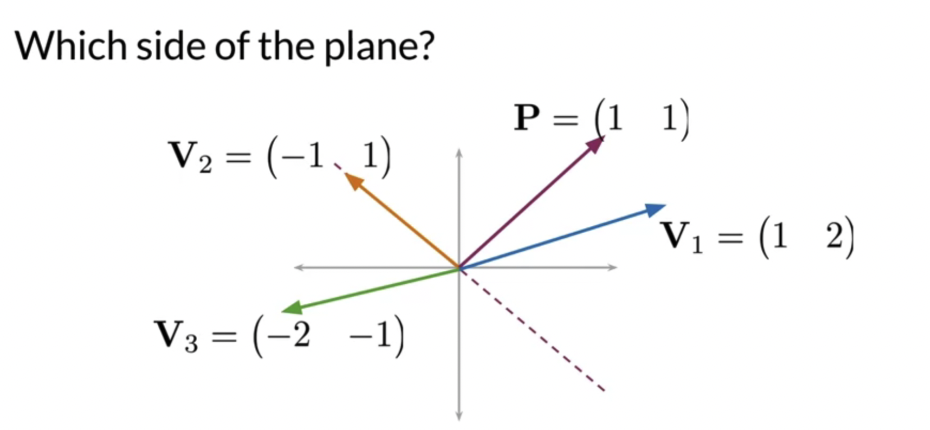

Step 2: We can find that out using the dot product, which gives the projection mangnitude and direction of vector 1 on the Vector 2, as discribed below
we are projecting vector $V_1$ and $V_2$ on Vector P, in which sign shows the direction. 

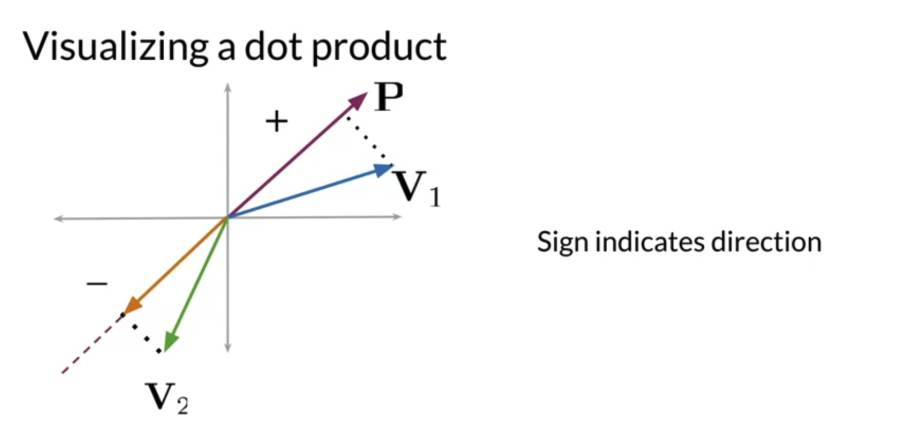

Step 3: Example which is telling the $V_1$ is in the same direction, $V_2$ is in opposite direction, while $V_3$ is on the plan $w.r.t$ vector P. 

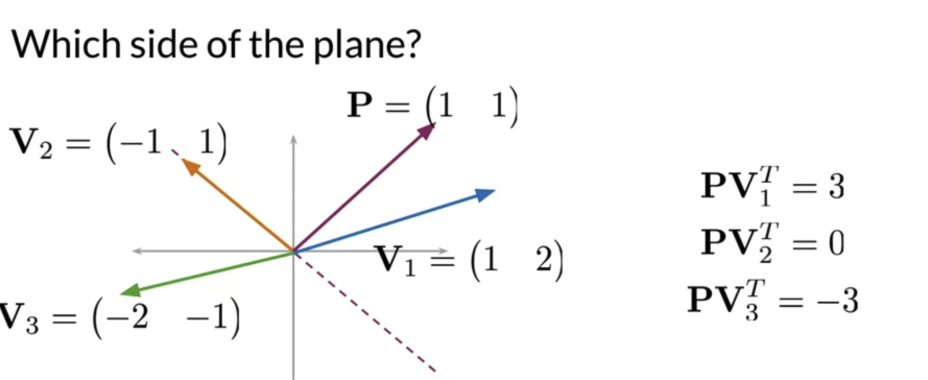


#### How to find that out using the Python

In [22]:
def side_of_plan(P,v):
    '''
    Input:
    P : is the vector 
    v : is the vector. 
    
    Output:
    '''
    dotproduct = np.dot(P,v.T)
    # print(dotproduct)
    sign_of_dot_product = np.sign(dotproduct)
    # print(sign_of_dot_product)
    sign_of_dot_product_scalar = np.asscalar(sign_of_dot_product)
    return sign_of_dot_product_scalar

In [23]:
print(side_of_plan(np.array([1,1]),np.array([1,2]))) # in same direction
print(side_of_plan(np.array([1,1]),np.array([-1,1]))) # on the plan
print(side_of_plan(np.array([1,1]),np.array([-2,-1]))) # in opposite direction

1
0
-1


/var/folders/71/0hv0cnx572v1z8mmdwyhht_h0000gn/T/ipykernel_29432/771198849.py:13: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  sign_of_dot_product_scalar = np.asscalar(sign_of_dot_product)


In [25]:
import math


In [26]:
math.sqrt(51)

7.14142842854285

<a name="3-4"></a>
### 3.4 - Getting the Hash Number for a Vector

For each vector, we need to get a unique number associated to that vector in order to assign it to a "hash bucket".

#### Hyperplanes in Vector Spaces
* In $3$-dimensional vector space, the hyperplane is a regular plane. In $2$ dimensional vector space, the hyperplane is a line.
* Generally, the hyperplane is subspace which has dimension $1$ lower than the original vector space has.
* A hyperplane is uniquely defined by its normal vector.
* Normal vector $n$ of the plane $\pi$ is the vector to which all vectors in the plane $\pi$ are orthogonal (perpendicular in $3$ dimensional case).

#### Using Hyperplanes to Split the Vector Space
We can use a hyperplane to split the vector space into $2$ parts.
* All vectors whose dot product with a plane's normal vector is positive are on one side of the plane.
* All vectors whose dot product with the plane's normal vector is negative are on the other side of the plane.

#### Encoding Hash Buckets
* For a vector, we can take its dot product with all the planes, then encode this information to assign the vector to a single hash bucket.
* When the vector is pointing to the opposite side of the hyperplane than normal, encode it by 0.
* Otherwise, if the vector is on the same side as the normal vector, encode it by 1.
* If you calculate the dot product with each plane in the same order for every vector, you've encoded each vector's unique hash ID as a binary number, like [0, 1, 1, ... 0].

<a name="ex-9"></a>
### Exercise 9 - hash_value_of_vector

We've initialized hash table `hashes` for you. It is list of `N_UNIVERSES` matrices, each describes its own hash table. Each matrix has `N_DIMS` rows and `N_PLANES` columns. Every column of that matrix is a `N_DIMS`-dimensional normal vector for each of `N_PLANES` hyperplanes which are used for creating buckets of the particular hash table.

*Exercise*: Your task is to complete the function `hash_value_of_vector` which places vector `v` in the correct hash bucket.

* First multiply your vector `v`, with a corresponding plane. This will give you a vector of dimension $(1,\text{N_planes})$.
* You will then convert every element in that vector to 0 or 1.
* You create a hash vector by doing the following: if the element is negative, it becomes a 0, otherwise you change it to a 1.
* You then compute the unique number for the vector by iterating over `N_PLANES`
* Then you multiply $2^i$ times the corresponding bit (0 or 1).
* You will then store that sum in the variable `hash_value`.

**Intructions:** Create a hash for the vector in the function below.
Use this formula:

$$ hash = \sum_{i=0}^{N-1} \left( 2^{i} \times h_{i} \right) $$